In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import pickle
import geopandas as gpd
import seaborn as sns
import plotly.graph_objects as go

/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  after removing the cwd from sys.path.


In [2]:
def plot_sec(T1,T2,lai_model,color,ax,linewidth):
    lai_temp=lai_model[(lai_model.DOY>=T1)&(lai_model.DOY<=T2)]
    ax.plot(lai_temp.DOY,lai_temp.LAI,color=color,linewidth=linewidth) 
    
    
def cal_periods(lai_model):
    
    lai_model=lai_model.resample('1D').mean()
    tr=.1
    temp_top=lai_model[lai_model.LAI>=lai_model.LAI.max()*(1-tr)]
    temp_bottom=lai_model[lai_model.LAI<=lai_model.LAI.min()*(1+tr)]

    a=temp_top.DOY.min()-temp_bottom
    a=a[a>0]
    b=temp_top.DOY.min()-a.min()
    t1=int(b.DOY)
    t2=temp_top.DOY.min()
    t3=temp_top.DOY.max()

    lai_temp=lai_model[lai_model.DOY>t3]
    temp_bottom=lai_temp[lai_temp.LAI<=lai_temp.LAI.min()*(1+tr)]
    a=temp_top.DOY.max()-temp_bottom
    a=a[a<0]
    b=temp_top.DOY.max()-a.max()
    t4=int(b.DOY)
    
    return [t1,t2,t3,t4]



def devid_all(lai_model,ax,linewidth):
    
    [t1,t2,t3,t4]=cal_periods(lai_model)


    plot_sec(0,t1,lai_model,'b',ax,linewidth)
    plot_sec(t1,t2,lai_model,'g',ax,linewidth)
    plot_sec(t2,t3,lai_model,'k',ax,linewidth)
    plot_sec(t3,t4,lai_model,'g',ax,linewidth)
    plot_sec(t4,365,lai_model,'b',ax,linewidth)


# LAI

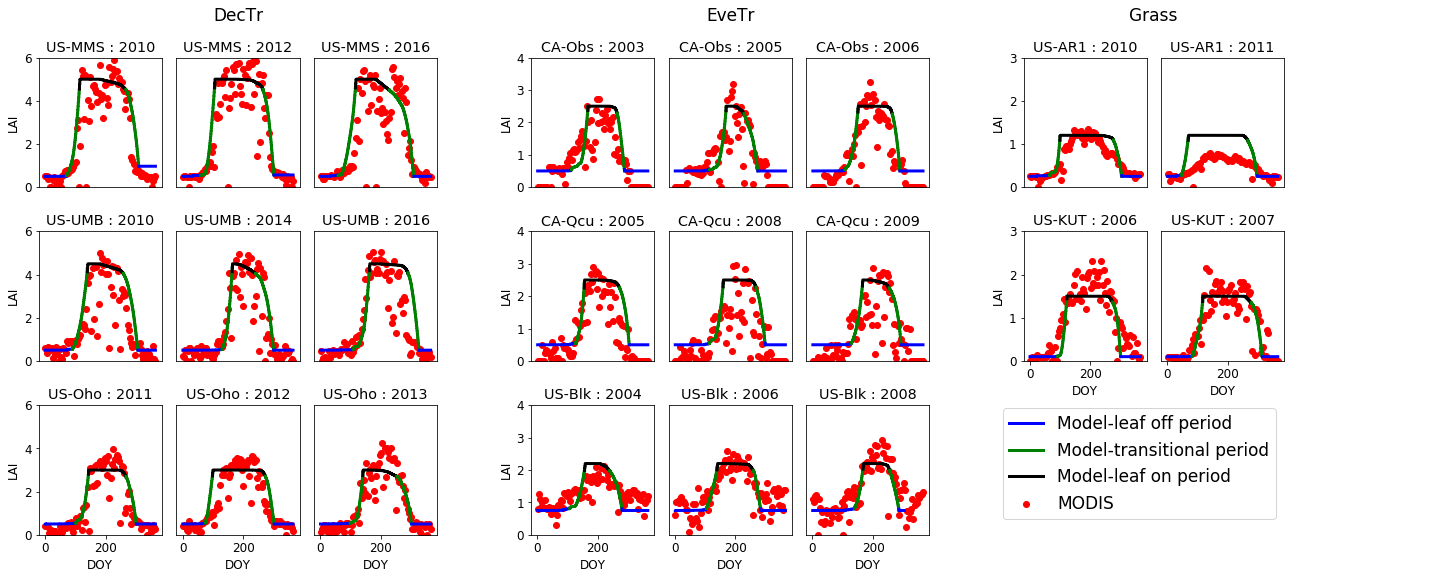

In [3]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))
height=1.8
width="30%"
linewidth=3

ax=axs[0]
names=['US-MMS','US-UMB','US-Oho']
years={'US-MMS':[2010,2012,2016],
       'US-UMB':[2010,2014,2016],
       'US-Oho':[2011,2012,2013]
      }
fig_number={'US-MMS':[2,9,1],
       'US-UMB':[6,10,7],
       'US-Oho':[3,8,4]
      }

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
            df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
            lai_model=pickle.load(f)
            
        #box_1.plot(lai_model.DOY,lai_model.LAI,color='b',label='Model',linewidth=linewidth)
        
        devid_all(lai_model,box_1,linewidth)
        box_1.scatter(df_period.index,df_period.value_mean,color='r',label='MODIS')
        box_1.set_title(name+' : '+str(year))
        
        box_1.set_ylim([0,6])
        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')
        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel('LAI')
        

ax.axis('off')
ax.set_title('DecTr',y=1.05,fontsize=17)






names=['CA-Obs','CA-Qcu','US-Blk']
years={
       names[0]:[2003,2005,2006],
       names[1]:[2005,2008,2009],
       names[2]:[2004,2006,2008]
      }
fig_number={names[0]:[2,9,1],
            names[1]:[6,10,7],
            names[2]:[3,8,4]
      }

ax=axs[1]
for name in names:
    for i,year in zip(fig_number[name],years[name]):
        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
            df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
            lai_model=pickle.load(f)

            #box_1.plot(lai_model.DOY,lai_model.LAI,color='b',label='Model',linewidth=linewidth)
            devid_all(lai_model,box_1,linewidth)
            box_1.scatter(df_period.index,df_period.value_mean,color='r',label='MODIS')
            box_1.set_title(name+' : '+str(year))
            box_1.set_ylim([0,4])

        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel('LAI')
    
ax.axis('off')
ax.set_title('EveTr',y=1.05,fontsize=17)






names=['US-AR1','US-KUT']
years={names[0]:[2010,2011],
       names[1]:[2006,2007]
      }
fig_number={names[0]:[2,9],
            names[1]:[6,10]
      }

ax=axs[2]

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):

        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
            df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
            lai_model=pickle.load(f)

            #box_1.plot(lai_model.DOY,lai_model.LAI,color='b',label='Model',linewidth=linewidth)
            devid_all(lai_model,box_1,linewidth)
            box_1.scatter(df_period.index,df_period.value_mean,color='r',label='MODIS')
            box_1.set_title(name+' : '+str(year))
            box_1.set_ylim([0,4])
        box_1.set_ylim([0,3])

        if i not in [10,6,7]:
            box_1.set_xticks([]) 
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel('LAI')
    
    
    
ax.axis('off')
ax.set_title('Grass',x=.33,y=1.05,fontsize=17)



plt.plot([],[],color='b',linewidth=linewidth,label='Model-leaf off period')
plt.plot([],[],color='g',linewidth=linewidth,label='Model-transitional period')
plt.plot([],[],color='k',linewidth=linewidth,label='Model-leaf on period')

plt.legend(bbox_to_anchor=(1, -.3),fontsize=17)

plt.savefig('LAI_all.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [4]:
def cal_stat(lai_model,df_period,T1,T2):
    lai_model_temp=lai_model[(lai_model.DOY>=T1)&(lai_model.DOY<=T2)]
    df_period_temp=df_period[(df_period.index>=T1)&(df_period.index<=T2)]

    lai_model_sub=lai_model_temp.resample('1d').mean().set_index('DOY').loc[df_period_temp.index,:]

    MAE=np.mean(abs(df_period_temp.value_mean-lai_model_sub.LAI))
    MBE=np.mean(df_period_temp.value_mean-lai_model_sub.LAI)
    
    return MAE,MBE

In [5]:
stats_LAI=pd.DataFrame(columns=['site','year','MAE-all','MBE-all',
                                'MAE-off','MBE-off',
                                'MAE-trans','MBE-trans',
                                'MAE-on','MBE-on',])

counter=-1


names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']
years={names[0]:[2010,2012,2016],
       names[1]:[2010,2014,2016],
       names[2]:[2011,2012,2013],
       names[3]:[2003,2005,2006],
       names[4]:[2005,2008,2009],
       names[5]:[2004,2006,2008],
       names[6]:[2010,2011],
       names[7]:[2006,2007],
      }


for name in names:
    
        
    for year in years[name]:
        counter=counter+1
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
                df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
                lai_model=pickle.load(f)

        [t1,t2,t3,t4]=cal_periods(lai_model)
        MAE_all,MBE_all=cal_stat(lai_model,df_period,0,365)
        
        MAE_off_1,MBE_off_1=cal_stat(lai_model,df_period,0,t1)
        MAE_off_2,MBE_off_2=cal_stat(lai_model,df_period,t4,365)
        MAE_off,MBE_off=[(MAE_off_1+MAE_off_2)/2,(MBE_off_1+MBE_off_2)/2]
 
        MAE_tra_1,MBE_tra_1=cal_stat(lai_model,df_period,t1,t2)
        MAE_tra_2,MBE_tra_2=cal_stat(lai_model,df_period,t3,t4)
        MAE_tra,MBE_tra=[(MAE_tra_1+MAE_tra_2)/2,(MBE_tra_1+MBE_tra_2)/2]
        
        MAE_on,MBE_on=cal_stat(lai_model,df_period,t2,t3)


        stats_LAI.loc[counter]=([name,year,np.round(MAE_all,2),np.round(MBE_all,2)]+
                                [round(MAE_off,2),round(MBE_off,2)]+
                                [round(MAE_tra,2),round(MBE_tra,2)]+
                                [round(MAE_on,2),round(MBE_on,2)])
        
stats_LAI.to_csv('LAI.csv',index=False)
stats_LAI

/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike

/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



,site,year,MAE-all,MBE-all,MAE-off,MBE-off,MAE-trans,MBE-trans,MAE-on,MBE-on
0,US-MMS,2010,0.68,-0.53,0.37,-0.34,0.95,-0.93,0.79,-0.48
1,US-MMS,2012,0.61,-0.35,0.12,-0.09,0.74,-0.58,0.91,-0.43
2,US-MMS,2016,0.75,-0.47,0.09,0.02,0.88,-0.39,1.31,-1.22
3,US-UMB,2010,0.69,-0.58,0.25,-0.08,0.98,-0.95,1.04,-0.95
4,US-UMB,2014,0.54,-0.28,0.23,-0.14,1.02,-0.27,0.74,-0.49
5,US-UMB,2016,0.72,-0.48,0.21,-0.16,1.27,-0.72,1.00,-0.88
6,US-Oho,2011,0.40,-0.21,0.20,-0.16,0.51,-0.44,0.59,-0.12
7,US-Oho,2012,0.48,-0.31,0.14,-0.09,0.76,-0.75,0.66,-0.35
8,US-Oho,2013,0.37,-0.05,0.17,-0.16,0.32,-0.04,0.71,0.09
9,CA-Obs,2003,0.47,-0.26,0.34,-0.23,0.63,-0.16,0.65,-0.62


In [64]:
attrs_all=pd.DataFrame(columns=['site','$LAI_{min}$','$LAI_{max}$',
                                 '$GDD_{Full}$','$SDD_{Full}$',
                                 '$T_{BaseSDD}$','$T_{BaseGDD}$',
                                 r'$\alpha_{min}$',r'$\alpha_{max}$'])

names=['US-MMS','US-UMB','US-Oho','CA-Obs','CA-Qcu','US-Blk','US-AR1','US-KUT']
counter=-1
for name in names:
    counter=counter+1
    with open('LAI/'+name+'-attrs','rb') as f:
        attrs=pickle.load( f)
    with open('albedo/'+name+'-attrs_albedo','rb') as f:
        attrs_alb=pickle.load( f)
        attrs_alb=[attrs_alb[0].loc[98][0],attrs_alb[1].loc[98][0]]
        
        attrs_all.loc[counter]=([name]+attrs+attrs_alb)
        
attrs_all.to_csv('attrs.csv',index=False)        
attrs_all

,site,$LAI_{min}$,$LAI_{max}$,$GDD_{Full}$,$SDD_{Full}$,$T_{BaseSDD}$,$T_{BaseGDD}$,$\alpha_{min}$,$\alpha_{max}$
0,US-MMS,0.50,5.0,450.0,-370.0,22.0,5.0,0.10,0.14
1,US-UMB,0.50,4.5,450.0,-370.0,16.0,5.0,0.10,0.14
2,US-Oho,0.50,3.0,450.0,-370.0,18.0,5.0,0.10,0.14
3,CA-Obs,0.50,2.5,450.0,-370.0,13.0,5.0,0.07,0.08
4,CA-Qcu,0.50,2.5,450.0,-370.0,11.0,2.0,0.08,0.13
5,US-Blk,0.75,2.2,450.0,-370.0,13.0,5.0,0.07,0.08
6,US-AR1,0.25,1.2,450.0,-370.0,20.0,5.0,0.14,0.16
7,US-KUT,0.10,1.5,450.0,-370.0,13.0,5.0,0.15,0.20


# Alebdo

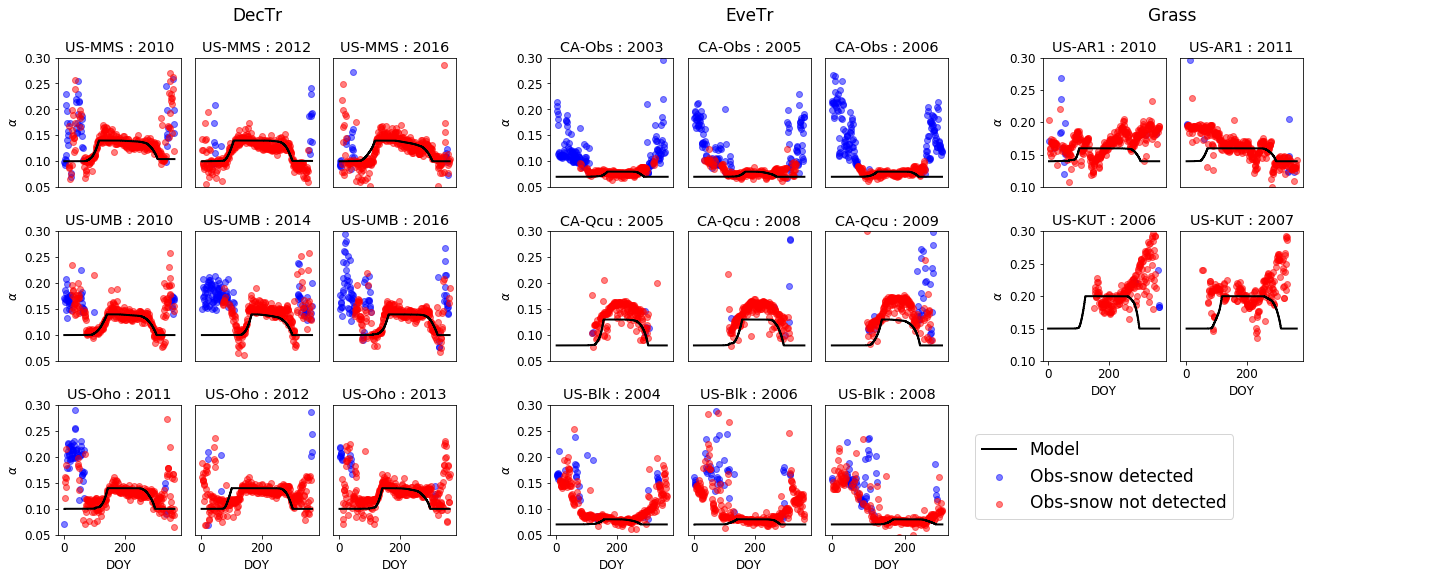

In [63]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))
height=1.8
width="30%"
linewidth=2

ax=axs[0]
names=['US-MMS','US-UMB','US-Oho']
years={'US-MMS':[2010,2012,2016],
       'US-UMB':[2010,2014,2016],
       'US-Oho':[2011,2012,2013]
      }
fig_number={'US-MMS':[2,9,1],
       'US-UMB':[6,10,7],
       'US-Oho':[3,8,4]
      }

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
        box_1.plot(out['model']['x'],out['model']['y'],color='k',label='Model',linewidth=linewidth)
        
        ay=out['obs']['y'].resample('1D').mean()
        axx=out['obs']['x'].resample('1D').mean()
        box_1.scatter(axx[out['snow']['y']>0],ay[out['snow']['y']>0],alpha=0.5,color='b',label='Obs')
        box_1.scatter(axx[out['snow']['y']<=0],ay[out['snow']['y']<=0],alpha=0.5,color='r',label='Obs')
        
#         ay=out['Tair']['y']
#         alby=out['obs']['y']
#         albx=out['obs']['x']
#         albx=albx.resample('1D').mean()
#         alby=alby.resample('1D').mean()
#         box_1.scatter(albx[ay<0],alby[ay<0],alpha=0.5,color='b',label='Obs')
#         box_1.scatter(albx[ay>=0],alby[ay>=0],alpha=0.5,color='r',label='Obs')
        
        #box_1.scatter(out['obs']['x'],out['obs']['y'],alpha=0.5,color='r',label='Obs')
        box_1.set_title(name+' : '+str(year))
        box_1.set_ylim([0.05,.3])
        
        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')
        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel(r'$\alpha$')
        

ax.axis('off')
ax.set_title('DecTr',y=1.05,fontsize=17)






names=['CA-Obs','CA-Qcu','US-Blk']
years={
       names[0]:[2003,2005,2006],
       names[1]:[2005,2008,2009],
       names[2]:[2004,2006,2008]
      }
fig_number={names[0]:[2,9,1],
            names[1]:[6,10,7],
            names[2]:[3,8,4]
      }

ax=axs[1]
for name in names:
    for i,year in zip(fig_number[name],years[name]):
        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
        box_1.plot(out['model']['x'],out['model']['y'],color='k',label='Model',linewidth=linewidth)

        ay=out['obs']['y'].resample('1D').mean()
        axx=out['obs']['x'].resample('1D').mean()
        box_1.scatter(axx[out['snow']['y']>0],ay[out['snow']['y']>0],alpha=0.5,color='b',label='Obs')
        box_1.scatter(axx[out['snow']['y']<=0],ay[out['snow']['y']<=0],alpha=0.5,color='r',label='Obs')
#         ay=out['Tair']['y']
#         alby=out['obs']['y']
#         albx=out['obs']['x']
#         albx=albx.resample('1D').mean()
#         alby=alby.resample('1D').mean()
#         box_1.scatter(albx[ay<0],alby[ay<0],alpha=0.5,color='b',label='Obs')
#         box_1.scatter(albx[ay>=0],alby[ay>=0],alpha=0.5,color='r',label='Obs')
        
        #box_1.scatter(out['obs']['x'],out['obs']['y'],alpha=0.5,color='r',label='Obs')
        box_1.set_title(name+' : '+str(year))
        box_1.set_ylim([0.05,.3])

        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel(r'$\alpha$')
    
ax.axis('off')
ax.set_title('EveTr',y=1.05,fontsize=17)






names=['US-AR1','US-KUT']
years={names[0]:[2010,2011],
       names[1]:[2006,2007]
      }
fig_number={names[0]:[2,9],
            names[1]:[6,10]
      }

ax=axs[2]

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):

        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
        box_1.plot(out['model']['x'],out['model']['y'],color='k',label='Model',linewidth=linewidth)

        ay=out['obs']['y'].resample('1D').mean()
        axx=out['obs']['x'].resample('1D').mean()
        box_1.scatter(axx[out['snow']['y']>0],ay[out['snow']['y']>0],alpha=0.5,color='b',label='Obs-snow detected')
        box_1.scatter(axx[out['snow']['y']<=0],ay[out['snow']['y']<=0],alpha=0.5,color='r',label='Obs-snow not detected')
        
#         ay=out['Tair']['y']
#         alby=out['obs']['y']
#         albx=out['obs']['x']
#         albx=albx.resample('1D').mean()
#         alby=alby.resample('1D').mean()
#         box_1.scatter(albx[ay<0],alby[ay<0],alpha=0.5,color='b',label='Obs-Snow')
#         box_1.scatter(albx[ay>=0],alby[ay>=0],alpha=0.5,color='r',label='Obs-no snow')
        
        #box_1.scatter(out['obs']['x'],out['obs']['y'],alpha=0.5,color='r',label='Obs')
        box_1.set_title(name+' : '+str(year))
        box_1.set_ylim([0.1,.3])

        if i not in [10,6,7]:
            box_1.set_xticks([]) 
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel(r'$\alpha$')
    
    
    
ax.axis('off')
ax.set_title('Grass',x=.33,y=1.05,fontsize=17)

plt.legend(bbox_to_anchor=(.5, -.5),fontsize=17)

plt.savefig('albedo_all.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [159]:
# plt.rcParams.update({'font.size': 15})
# fig,ax=plt.subplots(1,1,figsize=(25,9))
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world[world.continent=='North America'].plot(figsize=(15,15),ax=ax)
# all_sites_info =  pd.read_csv('site_info.csv')

# dectr=['US-MMS','US-UMB','US-Oho']
# evetr=['CA-Obs','CA-Qcu','US-Blk']
# grass=['US-AR1','US-KUT']

# names=dectr+evetr+grass
# for name in names:
#     site_info=all_sites_info[all_sites_info['Site Id'] == name]
#     df = pd.DataFrame(
#             {'Site': [name],
#              'Latitude': [site_info['Latitude (degrees)']],
#              'Longitude': [site_info['Longitude (degrees)']]})
#     gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
#     if name in dectr:
#         color='r'
#     elif name in evetr:
#         color='y'
#     elif name in grass:
#         color='k'
    
#     gdf.plot(ax=ax,color=color,markersize=100)
#     plt.annotate(name,(gdf.Longitude.values[0]+.55,gdf.Latitude.values[0]-.5),color=color)

# plt.xlim([-130,-60])
# plt.ylim([20,65])
# plt.scatter([],[],color='r',label='DecTr')
# plt.scatter([],[],color='y',label='EveTr')
# plt.scatter([],[],color='k',label='Grass')
# plt.legend(bbox_to_anchor=(.95, .4))
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# plt.savefig('map_of_sites.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


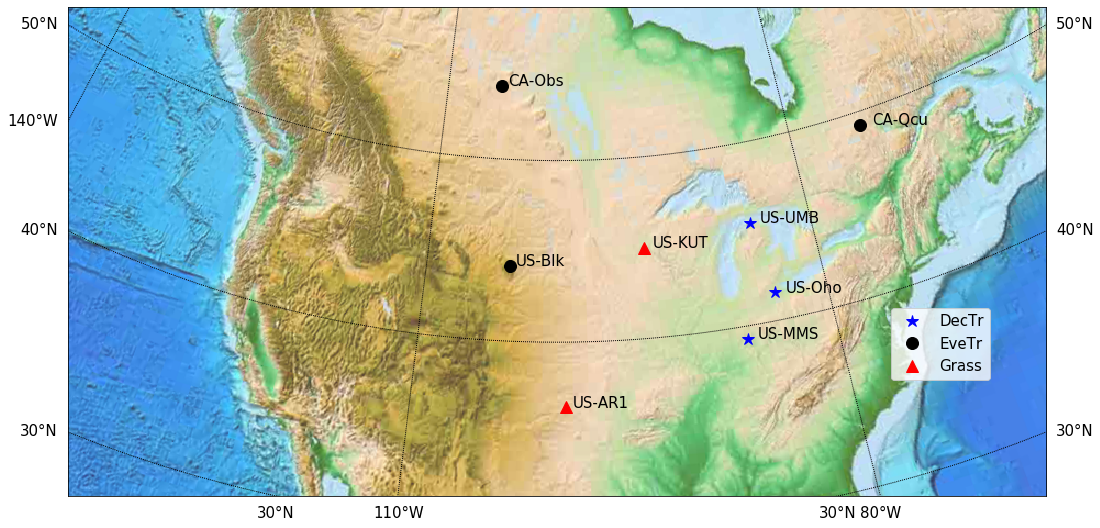

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


fig = plt.figure(figsize=(25, 9))
m = Basemap(projection='lcc', resolution=None,
            width=6E6, height=3E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=1.1, alpha=.8)

all_sites_info =  pd.read_csv('site_info.csv')

dectr=['US-MMS','US-UMB','US-Oho']
evetr=['CA-Obs','CA-Qcu','US-Blk']
grass=['US-AR1','US-KUT']

names=dectr+evetr+grass

for name in names:
    site_info=all_sites_info[all_sites_info['Site Id'] == name]
    df = pd.DataFrame(
            {'Site': [name],
             'Latitude': [site_info['Latitude (degrees)']],
             'Longitude': [site_info['Longitude (degrees)']]})
    x, y = m(df.Longitude.values[0].values[0], df.Latitude.values[0].values[0])
    
   
    if name in dectr:
        marker='*b'
    elif name in evetr:
        marker='ok'
    elif name in grass:
        marker='^r'
    plt.plot(x, y, marker, markersize=12)
    #gdf.plot(ax=ax,color=color,markersize=100)
    plt.annotate(name,(x*1.015,y),color='k')

plt.plot([],[],'*b',label='DecTr',markersize=12)
plt.plot([],[],'ok',label='EveTr',markersize=12)
plt.plot([],[],'^r',label='Grass',markersize=12)
plt.legend(bbox_to_anchor=(.95, .4))

parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,True,True,True])
meridians = np.arange(10.,351.,30.)
m.drawmeridians(meridians,labels=[True,False,False,True])

plt.savefig('map_of_sites.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [ ]:
# Surface Conductance

In [22]:
def IQR_compare(ob_name,sim_name,df_obs,df_sel_pos,ax):
    y=df_obs[ob_name].groupby(
            [df_obs.index.hour.rename('hr'),
            df_obs.index.minute.rename('min')])
    idx = [pd.datetime(2014, 1, 1, h, m) for h, m in sorted(y.groups.keys())]
    idx = pd.date_range(idx[0], idx[-1], freq='1h')
    
    df_var=df_sel_pos[[sim_name]]
    grp_sdf_var = df_var.groupby(
        [df_var.index.hour.rename('hr'),
        df_var.index.minute.rename('min')])

    idx = [pd.datetime(2014, 1, 1, h, m)
        for h, m in sorted(grp_sdf_var.groups.keys())]
    idx = pd.date_range(idx[0], idx[-1], freq='1h')
    # calculate quartiles
    quar_sel_pos_clm = grp_sdf_var.quantile(
        [.75, .5, .25]).unstack().set_index(idx)
    x_data=[i for i in range(0,24)]
    for var in quar_sel_pos_clm.columns.levels[0]:
        df_x = quar_sel_pos_clm.loc[:, var]
        y0 = df_x[0.5]
        y1, y2 = df_x[0.75], df_x[0.25]
        ax.plot(x_data,y0, label='Model',color='b', linewidth=4)
        ax.fill_between(x_data, y1, y2, alpha=0.3)
        
        
    
    line = ax.lines[0]
    y25=y.quantile([.25])
    y5=y.quantile([.5])
    y75=y.quantile([.75])
    ax.plot(x_data,y5,color='r', linewidth=4,label='Data')
    ax.fill_between(x_data, y25, y75, alpha=0.3)

    ax.set_xlim(0,23)
    
    
def obs_sim(ob_name,sim_name,df_obs,df_sel_pos,ax):
    
        
        df_QE_comp = pd.concat([df_obs, df_sel_pos], axis=1,
                                join='inner').loc[:, [sim_name, ob_name]]
        
        fig_comp_QE = sns.regplot(x='Obs', y='Sim',
                            data=df_QE_comp.rename(
                                columns={ob_name: 'Obs', sim_name: 'Sim'}),
                            fit_reg=True,ax=ax,color='b').figure
        ax.set_ylabel('')    
        ax.set_xlabel('')
        ax.set_title('')

        x0, x1 = ax.get_xlim()
        y0, y1 = ax.get_ylim()
        #ax.set_aspect(abs(x1 - x0) / abs(y1 - y0))
        sns.lineplot(x=[x0,x1],y=[x0,x1],ax=ax,color='k',linewidth=2)
        ax.lines[1].set_linestyle("--")
  

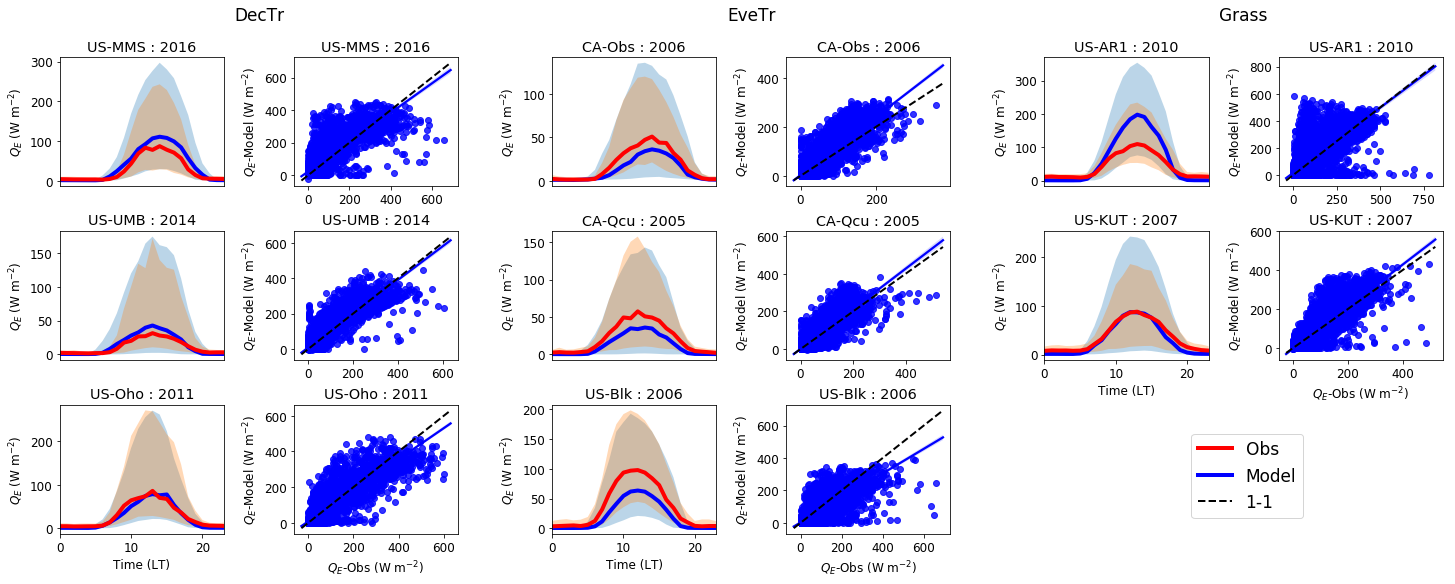

In [53]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))
height=1.8
width="40%"
linewidth=2

ax=axs[0]
names=['US-MMS','US-UMB','US-Oho']
years={'US-MMS':[2016],
       'US-UMB':[2014],
       'US-Oho':[2011]
      }
fig_number={'US-MMS':[2,1],
       'US-UMB':[6,7],
       'US-Oho':[3,4]
      }

for name in names:
    

    for year in years[name]:
        i=fig_number[name][0]
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('surface_conductance/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
 
        IQR_compare('qe','QE',out['IQR']['obs'],out['IQR']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        

        if i not in [3]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('Time (LT)')
            
        box_1.set_ylabel('$Q_E $ (W m$^{-2}$)')
            
        i=fig_number[name][1]        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)    
            
        obs_sim('qe','QE',out['obs_sim']['obs'],out['obs_sim']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        
        if i not in [4]:
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('$Q_E$-Obs (W m$^{-2}$)')

 

        box_1.set_ylabel('$Q_E$-Model (W m$^{-2}$)')
        
        

ax.axis('off')
ax.set_title('DecTr',y=1.05,fontsize=17)






names=['CA-Obs','CA-Qcu','US-Blk']
years={
       names[0]:[2006],
       names[1]:[2005],
       names[2]:[2006]
      }
fig_number={names[0]:[2,1],
            names[1]:[6,7],
            names[2]:[3,4]
      }

ax=axs[1]
for name in names:
    

    for year in years[name]:
        i=fig_number[name][0]
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('surface_conductance/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
 
        IQR_compare('qe','QE',out['IQR']['obs'],out['IQR']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        

        if i not in [3]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('Time (LT)')
            
        box_1.set_ylabel('$Q_E $ (W m$^{-2}$)')
            
        i=fig_number[name][1]        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)    
            
        obs_sim('qe','QE',out['obs_sim']['obs'],out['obs_sim']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        
        if i not in [4]:
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('$Q_E$-Obs (W m$^{-2}$)')

 

        box_1.set_ylabel('$Q_E$-Model (W m$^{-2}$)')
        
        

ax.axis('off')
ax.set_title('EveTr',y=1.05,fontsize=17)






names=['US-AR1','US-KUT']
years={names[0]:[2010],
       names[1]:[2007]
      }
fig_number={names[0]:[2,1],
            names[1]:[6,7]
      }

ax=axs[2]

for name in names:
    

    for year in years[name]:
        i=fig_number[name][0]
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('surface_conductance/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
 
        IQR_compare('qe','QE',out['IQR']['obs'],out['IQR']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        

        if i not in [6]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('Time (LT)')
            
        box_1.set_ylabel('$Q_E $ (W m$^{-2}$)')
            
        i=fig_number[name][1]        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)    
            
        obs_sim('qe','QE',out['obs_sim']['obs'],out['obs_sim']['model'],box_1)
        box_1.set_title(name+' : '+str(year))
        
        if i not in [7]:
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('$Q_E$-Obs (W m$^{-2}$)')

 

        box_1.set_ylabel('$Q_E$-Model (W m$^{-2}$)')
        
        
ax.axis('off')
ax.set_title('Grass',x=.5,y=1.05,fontsize=17)


plt.plot([],[],color='r',label='Obs',linewidth=4)
plt.plot([],[],color='b',label='Model',linewidth=4)
plt.plot([],[],'k--',label='1-1',linewidth=2)
plt.legend(bbox_to_anchor=(.2, -.5),fontsize=17)




plt.savefig('gs_all.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)